 Time Series

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("D:/MonthWiseMarketArrivals_Clean.csv")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [10]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

Q1.
Get the modal price of onion for each month for the Mumbai market

In [13]:
data['date']=pd.to_datetime(data['date'],infer_datetime_format=True)
data.set_index(['date'],inplace=True)

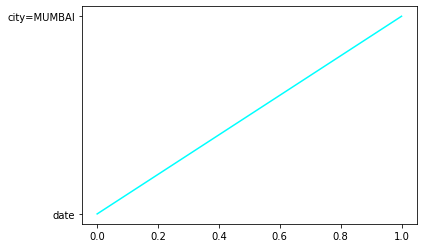

In [18]:
data2 = ['date', 'city=MUMBAI']
plt.plot(data2, color='cyan')

Q2.
Build time series model and check the performance of the model using RMSE

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    orig = plt.plot(timeseries, color='blue',label='original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dfest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dfest[0:4], index=['Test Static', 'P-Value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dfest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

In [23]:
import numpy as np

In [26]:
data18 = pd.get_dummies(data)

In [27]:
data18 = np.array(data18, dtype=np.float32)

In [29]:
data18 = pd.DataFrame(data18)

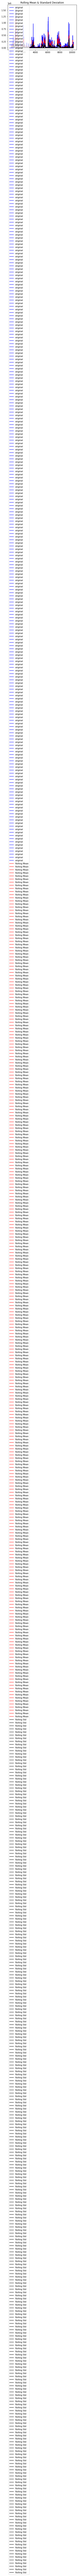

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [30]:
test_stationarity(data18)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


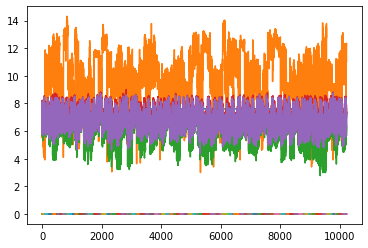

In [31]:
ts_log = np.log(data18)
plt.plot(ts_log)

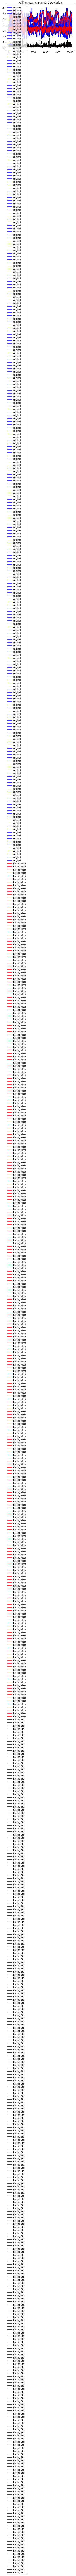

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [32]:
test_stationarity(ts_log)

In [33]:
moving_avg=ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff[7:15]

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0.000582,-0.981049,0.162594,0.276042,0.183707,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.000788,-0.066164,-0.478873,-0.514252,-0.516638,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.000995,0.163715,0.442947,0.439524,0.444910,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.001326,0.412273,-0.042457,0.005298,-0.027237,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#dropping NAs
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274


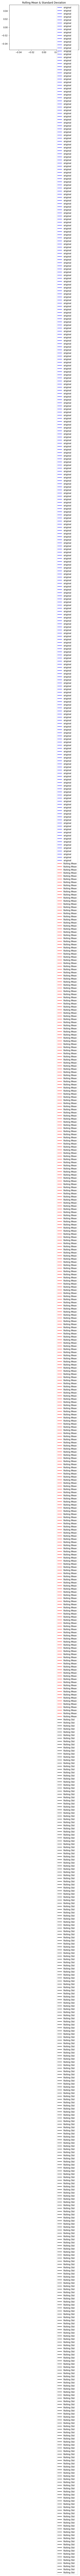

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [35]:
test_stationarity(ts_log_moving_avg_diff)

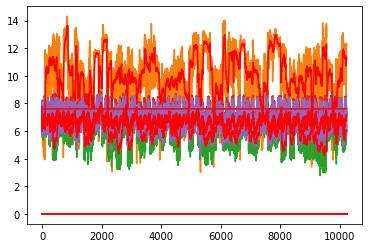

In [36]:
expwighted_avg =ts_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

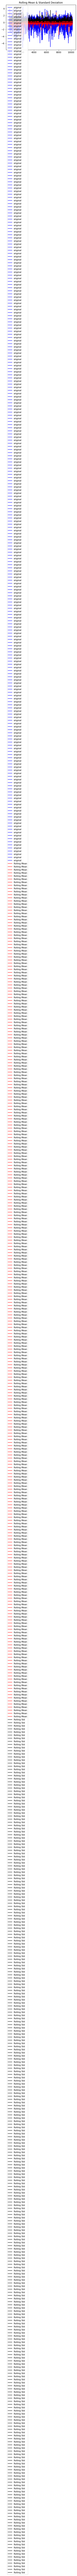

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [37]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff) 

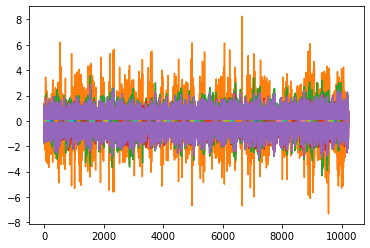

In [39]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

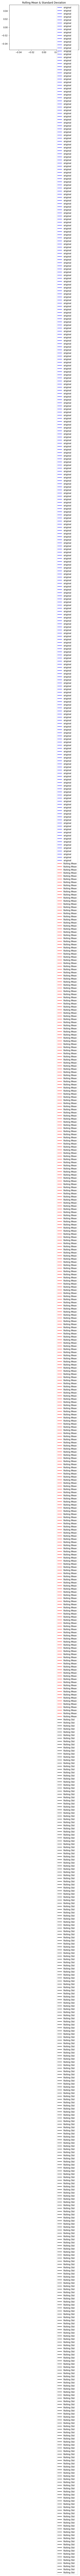

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [40]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)